In [32]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [34]:
from sklearn import random_projection
import neurokit2 as nk
import cccrt
from IPython.display import Audio
import librosa
import librosa.display
import seaborn as sns
import nolds

In [238]:
def quantise(v, symcount):
    return array((v - np.min(v))/np.max(v) * 0.999999999999999999 * symcount, dtype=int)

quantise(arange(-1,1,0.1),4)

array([0, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8])

In [379]:
rvalues = arange(3.5,4.0,0.0005)
rvalues

array([3.5   , 3.5005, 3.501 , 3.5015, 3.502 , 3.5025, 3.503 , 3.5035,
       3.504 , 3.5045, 3.505 , 3.5055, 3.506 , 3.5065, 3.507 , 3.5075,
       3.508 , 3.5085, 3.509 , 3.5095, 3.51  , 3.5105, 3.511 , 3.5115,
       3.512 , 3.5125, 3.513 , 3.5135, 3.514 , 3.5145, 3.515 , 3.5155,
       3.516 , 3.5165, 3.517 , 3.5175, 3.518 , 3.5185, 3.519 , 3.5195,
       3.52  , 3.5205, 3.521 , 3.5215, 3.522 , 3.5225, 3.523 , 3.5235,
       3.524 , 3.5245, 3.525 , 3.5255, 3.526 , 3.5265, 3.527 , 3.5275,
       3.528 , 3.5285, 3.529 , 3.5295, 3.53  , 3.5305, 3.531 , 3.5315,
       3.532 , 3.5325, 3.533 , 3.5335, 3.534 , 3.5345, 3.535 , 3.5355,
       3.536 , 3.5365, 3.537 , 3.5375, 3.538 , 3.5385, 3.539 , 3.5395,
       3.54  , 3.5405, 3.541 , 3.5415, 3.542 , 3.5425, 3.543 , 3.5435,
       3.544 , 3.5445, 3.545 , 3.5455, 3.546 , 3.5465, 3.547 , 3.5475,
       3.548 , 3.5485, 3.549 , 3.5495, 3.55  , 3.5505, 3.551 , 3.5515,
       3.552 , 3.5525, 3.553 , 3.5535, 3.554 , 3.5545, 3.555 , 3.5555,
      

In [381]:
figsize(20,3)
def logisticMap(x, r):
    x = r * x * (1 - x)
    return x  
lmlen = 400
lm = zeros((len(rvalues), lmlen))
for i_r, r in enumerate(rvalues):
    x=random.random()
    # print(r)
    for i in range(lmlen):
        x = logisticMap(x, r)
        lm[i_r][i] = x
# plot(arange(len(lm)), lm)

In [436]:
def lmap_ly(n, r):
    lyapunov = 0
    x=random.random()
    for i in range(n):
        x = r * x * (1-x)
        lyapunov += np.log(abs(r - 2 * r * x))
    return lyapunov / n

lmap_ly(100,4)

0.6929348557150286

In [382]:
lm

array([[0.87329373, 0.38728126, 0.8305307 , ..., 0.38281968, 0.82694071,
        0.50088421],
       [0.64816841, 0.79827546, 0.56369165, ..., 0.82683895, 0.50118865,
        0.87512005],
       [0.66089092, 0.7846235 , 0.59163211, ..., 0.87524221, 0.38228568,
        0.82673783],
       ...,
       [0.33196924, 0.88673001, 0.40160895, ..., 0.22628264, 0.7000526 ,
        0.83960085],
       [0.40413368, 0.96299778, 0.14249657, ..., 0.983956  , 0.06313056,
        0.23652121],
       [0.51592386, 0.99886085, 0.00455084, ..., 0.21662926, 0.67871924,
        0.87212871]])

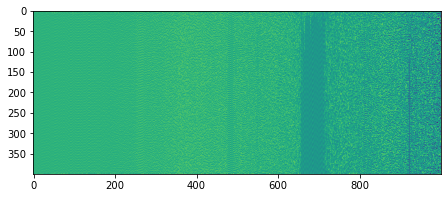

In [383]:
imshow(array(lm).T)

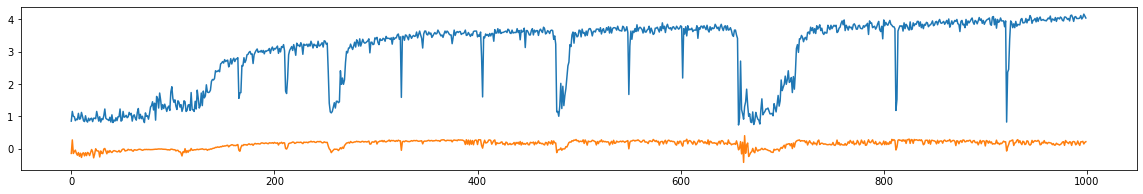

In [385]:
lmlzs = [cccrt.NLZ(quantise(x,256)) for x in lm]
plot(lmlzs)
plot(lmlyaps)

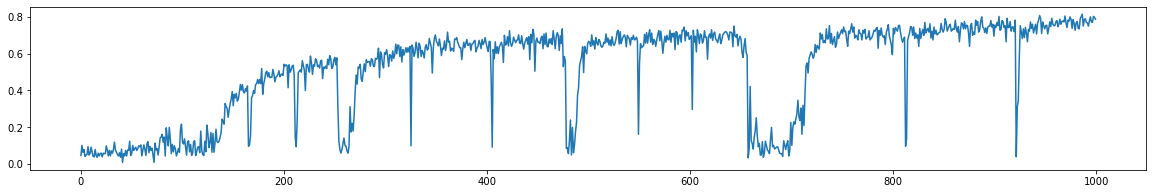

In [387]:
lmetcs = [cccrt.ETC(quantise(x,256)) for x in lm]
plot(lmetcs)

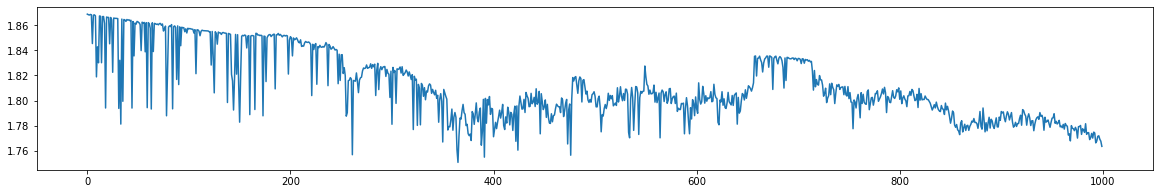

In [388]:
lmsev = [cccrt.sevcik(x) for x in lm]
plot(lmsev)

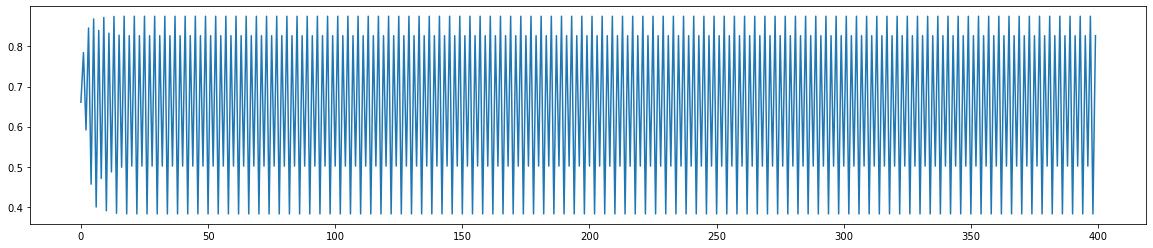

In [463]:
plot(lm[2])

In [470]:
dims = [nk.complexity_dimension(x, method="cd", dimension_max=3)[0] for x in lm]

In [476]:
dz = zeros_like(dims)
[[z,m] for z,m in zip(dz, dims)]
0

0

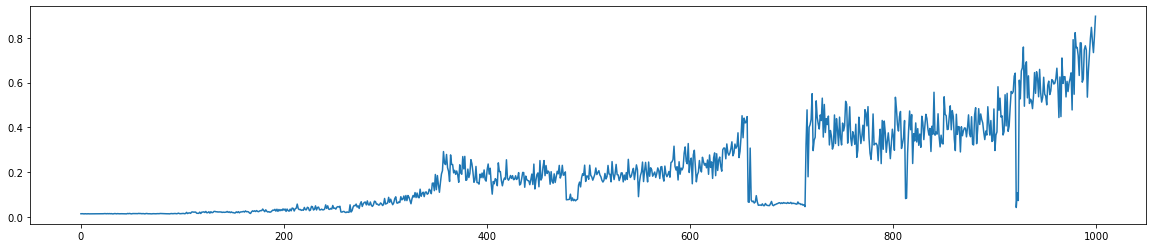

In [478]:
lmmse = [nk.entropy_multiscale(x, dimension=d)[0] for x,d in zip(lm, dims)]
plot(lmmse)

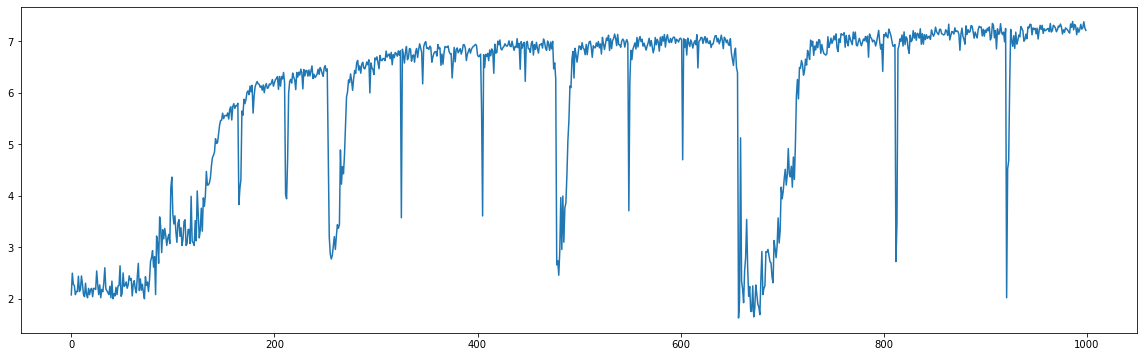

In [392]:
lmshan = [cccrt.shannonEntropy(quantise(x,256)) for x in lm]
plot(lmshan)

In [393]:
proj = cccrt.createRPMatrix(16,4)
lmRPCs = [cccrt.RPC(proj, x, 6, 0.5) for x in lm]

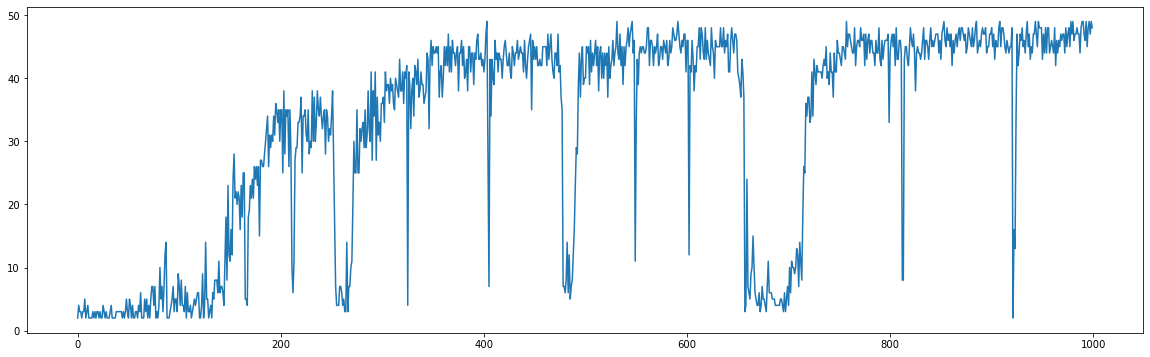

In [394]:
plot(lmRPCs)

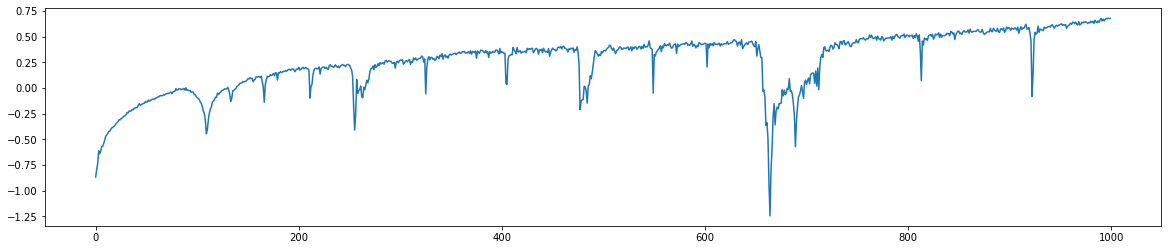

In [438]:
lmlyaps = [lmap_ly(lmlen, r) for r in rvalues]
plot(lmlyaps)

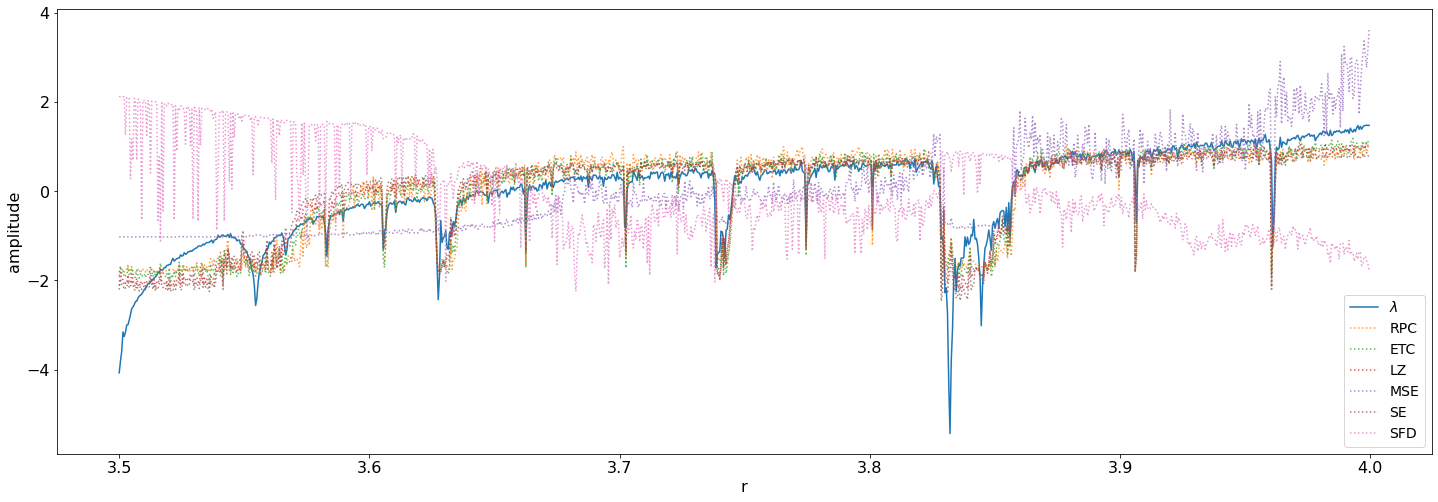

In [483]:
import seaborn as sns
from sklearn.preprocessing import scale
matplotlib.rcParams.update({'font.size': 16})
figsize(20,7)
pal="rocket"
alpha=0.75
lstyle='dotted'
sns.lineplot(x=rvalues,y=scale(lmlyaps), alpha=1, label="$\lambda$", palette=pal)
sns.lineplot(x=rvalues, y=scale(lmRPCs), alpha=alpha, linestyle = lstyle, label="RPC", palette=pal)
sns.lineplot(x=rvalues, y=scale(lmetcs), alpha=alpha, linestyle = lstyle, label="ETC", palette=pal)
sns.lineplot(x=rvalues, y=scale(lmlzs), alpha=alpha, linestyle = lstyle, label="LZ", palette=pal)
sns.lineplot(x=rvalues, y=scale(lmmse), alpha=alpha, linestyle = lstyle, label="MSE", palette=pal)
sns.lineplot(x=rvalues, y=scale(lmshan), alpha=alpha, linestyle = lstyle, label="SE", palette=pal)
sns.lineplot(x=rvalues, y=scale(lmsev), alpha=alpha, linestyle = lstyle, label="SFD", palette=pal)
plt.legend(fontsize=14)
plt.tight_layout()
xlabel("r")
ylabel("amplitude")
plt.savefig("lmap.pdf")


In [440]:
import scipy
rs = []
for x in [lmRPCs, lmetcs, lmlzs, lmmse, lmshan, lmsev]:
    rs.append(scipy.stats.pearsonr(lmlyaps, x)[0])
    
rs

[0.8917776351978788,
 0.9104100761457542,
 0.9113635549642553,
 0.7593252685022656,
 0.8911248763195593,
 -0.7486947347741003]